In [5]:
#Dataset- Covid dataset
#Name  - Puneet Yadav 2337


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [9]:
import warnings
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from pycaret.regression import *


warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
data = pd.read_csv('Latest Covid-19 India Status.csv')
print('Shape of the given Data-', data.shape)
print('Columns in given data are-',data.columns.values)

Shape of the given Data- (36, 8)
Columns in given data are- ['State/UTs' 'Total Cases' 'Active' 'Discharged' 'Deaths'
 'Active Ratio (%)' 'Discharge Ratio (%)' 'Death Ratio (%)']


In [12]:
#Click show ouput to view the data 

<h1>Data Description</h1>

This dataset contains latest Covid-19 India state-wise data as on September 07, 2021. This dataset can be used to analyze covid condition in India.
This dataset is great for Exploratory Data Analysis

* Attribute Information
* State/UTs - Names of Indian States and Union Territories.
* Total Cases - Total number of confirmed cases
* Active - Total number of active cases
* Discharged - Total number of discharged cases
* Deaths - Total number of deaths
* Active Ratio (%) - Ratio of number of active cases to total cases
* Discharge Ratio (%) - Ratio of number of discharged cases to total cases
* Death Ratio (%) - Ratio of number of deaths to total cases

In [13]:
data.isnull().sum()

State/UTs              0
Total Cases            0
Active                 0
Discharged             0
Deaths                 0
Active Ratio (%)       0
Discharge Ratio (%)    0
Death Ratio (%)        0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [15]:
data.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,9.306815e+05,8599.305556,9.097104e+05,12371.805556,1.111389,97.620278,1.267222
std,1.376378e+06,28560.135752,1.336378e+06,23784.824599,3.101292,2.982404,0.568057
min,7.600000e+03,0.000000,7.458000e+03,4.000000,0.000000,81.090000,0.040000
25%,8.101175e+04,136.750000,7.380750e+04,815.750000,0.037500,97.637500,0.955000
50%,4.732740e+05,438.500000,4.637270e+05,5470.000000,0.470000,98.280000,1.300000
75%,1.009009e+06,4956.250000,9.953420e+05,13691.750000,0.742500,98.660000,1.575000
max,6.524498e+06,167578.000000,6.340723e+06,138546.000000,18.590000,99.960000,2.740000


In [16]:
data.style.background_gradient(cmap="Blues")

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7600,13,7458,129,0.170000,98.130000,1.700000
1,Andhra Pradesh,2039529,14388,2011063,14078,0.710000,98.600000,0.690000
2,Arunachal Pradesh,54126,410,53444,272,0.760000,98.740000,0.500000
3,Assam,598423,4984,587632,5807,0.830000,98.200000,0.970000
4,Bihar,725901,69,716173,9659,0.010000,98.660000,1.330000
5,Chandigarh,65188,41,64329,818,0.060000,98.680000,1.250000
6,Chhattisgarh,1005094,297,991234,13563,0.030000,98.620000,1.350000
7,Dadra and Nagar Haveli and Daman and Diu,10670,0,10666,4,0.000000,99.960000,0.040000
8,Delhi,1438517,379,1413053,25085,0.030000,98.230000,1.740000
9,Goa,175583,810,171478,3295,0.460000,97.660000,1.880000


In [17]:
data = data.rename(columns={'State/UTs': 'State'})
data.at[7,'State']='DNHDD'

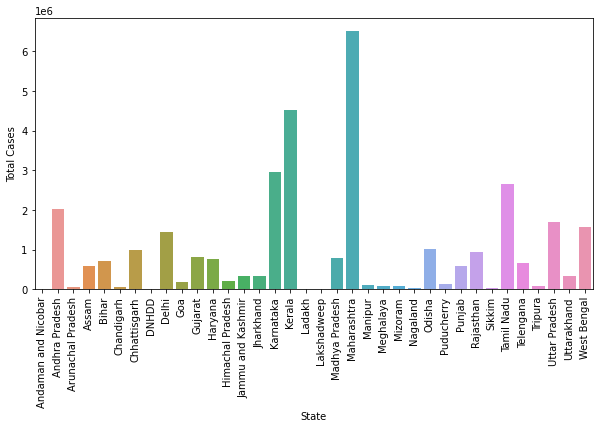

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x= data['State'],y= data['Total Cases'])
plt.xticks(rotation=90)
plt.show()

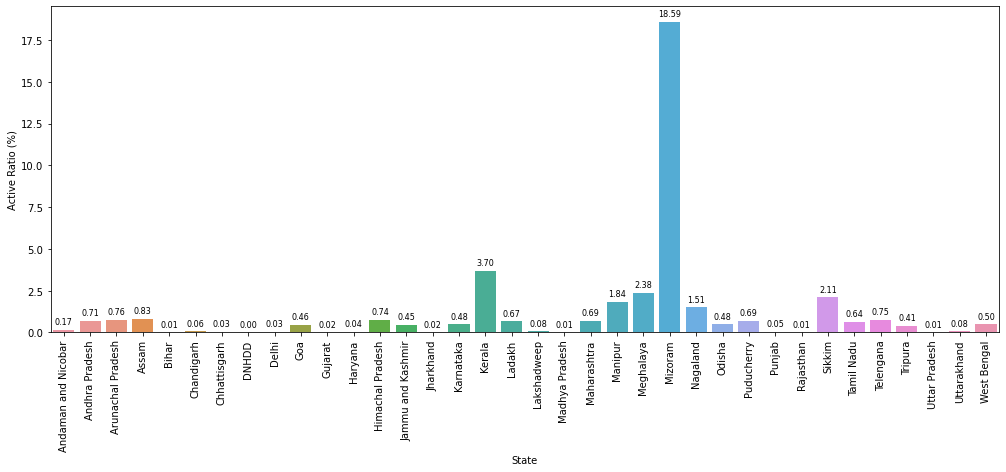

In [19]:
plt.figure(figsize=(17,6))
plots = sns.barplot(x= data['State'],y= data['Active Ratio (%)'])
plt.xticks(rotation=90)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
 


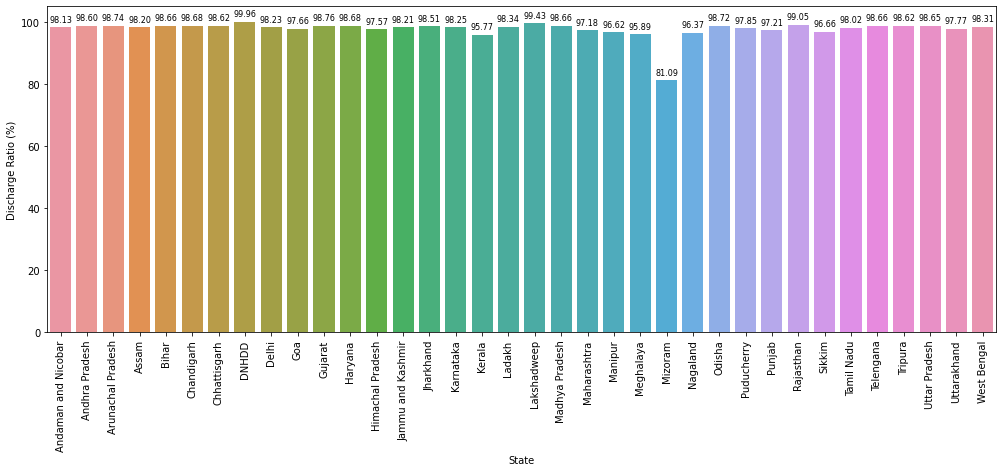

In [20]:
plt.figure(figsize=(17,6))
plots = sns.barplot(x= data['State'],y= data['Discharge Ratio (%)'])
plt.xticks(rotation=90)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
 

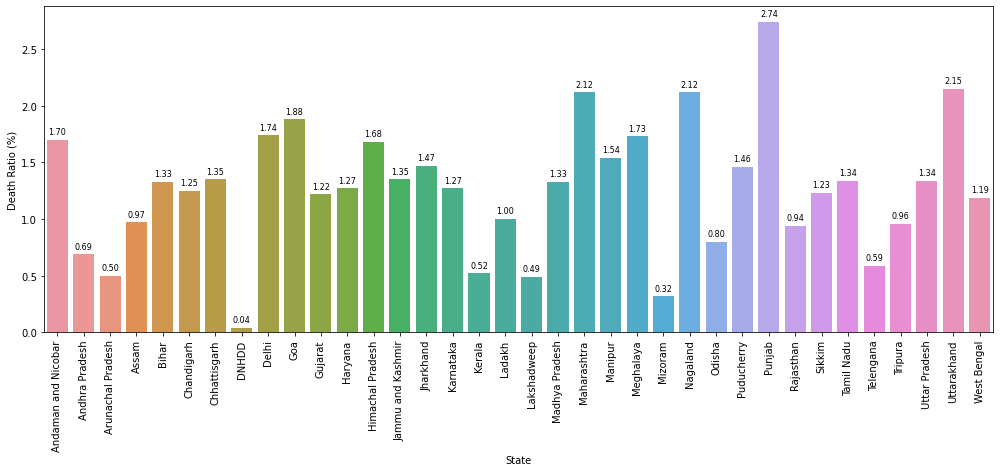

In [21]:
plt.figure(figsize=(17,6))
plots = sns.barplot(x= data['State'],y= data['Death Ratio (%)'])
plt.xticks(rotation=90)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
 

<AxesSubplot:>

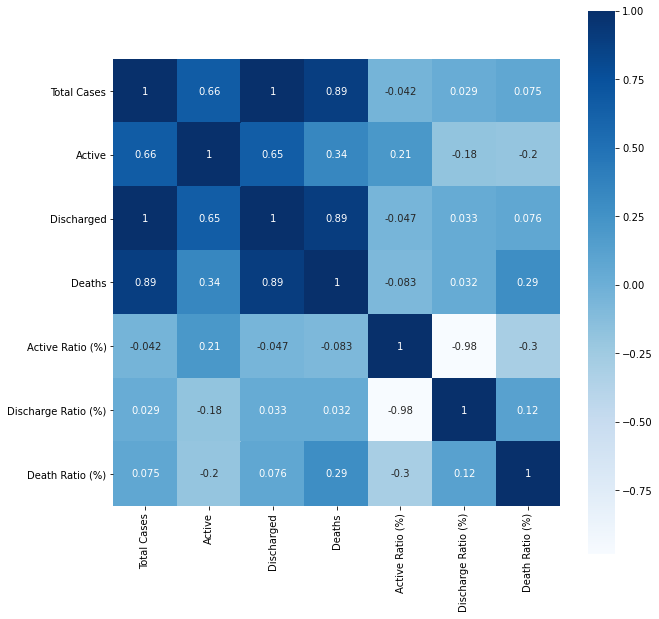

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True, square= True, cmap='Blues')

In [23]:
X = data.drop(['State','Death Ratio (%)'],axis=1)
y = data['Death Ratio (%)']

In [55]:
data_1 = data.copy()
data_1.drop(['Death Ratio (%)'],axis=1,inplace=True)
data_1.drop(['State'],axis=1,inplace=True)
col_drop = data_1[:2]
data_1 = data_1.iloc[2:]
Deaths = col_drop.Deaths
col_drop.drop('Deaths',axis=1,inplace=True)

In [56]:
data_1

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%)
2,54126,410,53444,272,0.76,98.74
3,598423,4984,587632,5807,0.83,98.20
4,725901,69,716173,9659,0.01,98.66
5,65188,41,64329,818,0.06,98.68
6,1005094,297,991234,13563,0.03,98.62
7,10670,0,10666,4,0.00,99.96
8,1438517,379,1413053,25085,0.03,98.23
9,175583,810,171478,3295,0.46,97.66
10,825737,133,815522,10082,0.02,98.76
11,770746,340,760598,9808,0.04,98.68


In [57]:
col_drop

,Total Cases,Active,Discharged,Active Ratio (%),Discharge Ratio (%)
0,7600,13,7458,0.17,98.13
1,2039529,14388,2011063,0.71,98.60


In [58]:
env = setup(data= data_1,target='Deaths',train_size=0.99,normalize=True,normalize_method='robust',session_id = 69,silent=True)

,Description,Value
0,session_id,69
1,Target,Deaths
2,Original Data,"(34, 6)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(33, 4)"


In [59]:
model = compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,6979.8183,404192599.2617,10139.6577,0.3179,1.3219,53.1055,0.0110
omp,Orthogonal Matching Pursuit,6604.6781,291423386.4640,9495.9123,0.0745,1.3508,19.1302,0.0090
rf,Random Forest Regressor,6669.0264,406432108.2893,10774.9026,-0.0369,0.9756,38.5643,0.0640
et,Extra Trees Regressor,6641.3562,480082782.0615,11448.7448,-0.2622,0.7371,2.3437,0.0520
gbr,Gradient Boosting Regressor,6710.3842,448162076.2466,11005.9640,-0.3096,0.8238,45.5983,0.0150
dt,Decision Tree Regressor,7902.5167,605434806.5000,13606.7278,-1.6972,0.8627,1.1481,0.0090
ada,AdaBoost Regressor,8764.2787,677650825.9733,14177.7302,-2.3323,1.2103,106.7683,0.0210
huber,Huber Regressor,8825.3817,1075267659.2646,14908.2911,-4.5224,1.3330,66.2345,0.0120
lightgbm,Light Gradient Boosting Machine,12931.2814,549479097.5236,16078.7170,-4.5564,2.2024,132.5895,0.0080
llar,Lasso Least Angle Regression,9798.8739,813002664.7015,15320.4899,-5.0938,1.5487,129.9513,0.0100


In [60]:
tuned_model = tune_model(model,fold=10,optimize='RMSE',early_stopping=True,early_stopping_max_iters=10,choose_better = True)
final_model = finalize_model(tuned_model)
print(final_model)

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:51:43
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 29, n_neighbors = 48

In [61]:
from sklearn.linear_model import HuberRegressor
y_train = data_1.Deaths
data_1.drop(['Deaths'],axis=1,inplace=True)
hub = HuberRegressor(alpha=0.001, epsilon=1.7, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
hub.fit(data_1,y_train)
pred = hub.predict(col_drop)

In [62]:
print(f'Predicted Deaths: {int(pred[0])}')
print(f'Actual Casuality caused: {Deaths.values[0]}')

Predicted Deaths: 128
Actual Casuality caused: 129
